In [1]:
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tnrange
import scipy.stats
import pandas as pd
from scipy.stats import rankdata
from sklearn.metrics import explained_variance_score

In [2]:
C4_diff_raw = np.load("/media/hdd01/sklee/CA1_clust4-60/clust/gru_s5_h20_pretrain_output_rep1.npz")["C_syn_e"]
C4_nona_raw = np.load("/media/hdd01/sklee/CA1_clust4-60_noNA/clust/gru_s5_h20_pretrain_output_rep1.npz")["C_syn_e"]
C8_diff_raw = np.load("/media/hdd01/sklee/CA1_clust8-30/clust/gru_s9_h20_pretrain_output_rep1.npz")["C_syn_e"]
C8_nona_raw = np.load("/media/hdd01/sklee/CA1_clust8-30_noNA/clust/gru_s9_h20_pretrain_output_rep1.npz")["C_syn_e"]
C12_diff_raw = np.load("/media/hdd01/sklee/CA1_clust12-20/clust/gru_s13_h20_pretrain_output_rep1.npz")["C_syn_e"]
C12_nona_raw = np.load("/media/hdd01/sklee/CA1_clust12-20_noNA/clust/gru_s13_h20_pretrain_output_rep1.npz")["C_syn_e"]

C4_dist_raw = np.load("/media/hdd01/sklee/CA1_clust4-60/data/clust4_syn_dist.npy")[:,-1]
C8_dist_raw = np.load("/media/hdd01/sklee/CA1_clust8-30/data/clust8_syn_dist.npy")[:,-1]
C12_dist_raw = np.load("/media/hdd01/sklee/CA1_clust12-20/data/clust12_syn_dist.npy")[:,-1]

C4_diff_scale = np.load("/media/hdd01/sklee/CA1_clust4-60/clust/gru_s5_h20_pretrain_output_rep1.npz")["E_scale"]
C4_nona_scale = np.load("/media/hdd01/sklee/CA1_clust4-60_noNA/clust/gru_s5_h20_pretrain_output_rep1.npz")["E_scale"]
C8_diff_scale = np.load("/media/hdd01/sklee/CA1_clust8-30/clust/gru_s9_h20_pretrain_output_rep1.npz")["E_scale"]
C8_nona_scale = np.load("/media/hdd01/sklee/CA1_clust8-30_noNA/clust/gru_s9_h20_pretrain_output_rep1.npz")["E_scale"]
C12_diff_scale = np.load("/media/hdd01/sklee/CA1_clust12-20/clust/gru_s13_h20_pretrain_output_rep1.npz")["E_scale"]
C12_nona_scale = np.load("/media/hdd01/sklee/CA1_clust12-20_noNA/clust/gru_s13_h20_pretrain_output_rep1.npz")["E_scale"]

In [4]:
C4_diff_idx = np.zeros((2000))
C4_nona_idx = np.zeros((2000))
C8_diff_idx = np.zeros((2000))
C8_nona_idx = np.zeros((2000))
C12_diff_idx = np.zeros((2000))
C12_nona_idx = np.zeros((2000))

for i in tnrange(2000):
    C4_diff_idx[i] = np.argmax(C4_diff_raw[:,i])
    C4_nona_idx[i] = np.argmax(C4_nona_raw[:,i])
    C8_diff_idx[i] = np.argmax(C8_diff_raw[:,i])
    C8_nona_idx[i] = np.argmax(C8_nona_raw[:,i])
    C12_diff_idx[i] = np.argmax(C12_diff_raw[:,i])
    C12_nona_idx[i] = np.argmax(C12_nona_raw[:,i])


<ipython-input-4-4c9d11e8e266>:8: TqdmDeprecationWarning: Please use `tqdm.notebook.trange` instead of `tqdm.tnrange`
  for i in tnrange(2000):


  0%|          | 0/2000 [00:00<?, ?it/s]

In [8]:
C4_diff = np.zeros((2000,2000))
C4_nona = np.zeros((2000,2000))
C8_diff = np.zeros((2000,2000))
C8_nona = np.zeros((2000,2000))
C12_diff = np.zeros((2000,2000))
C12_nona = np.zeros((2000,2000))

for i in tnrange(2000):
    for j in range(2000):
        if C4_diff_idx[i] == C4_diff_idx[j]:
            C4_diff[i,j] = C4_diff_scale[i] * C4_diff_scale[j]
            C4_diff[j,i] = C4_diff_scale[i] * C4_diff_scale[j]
        else:
            C4_diff[i,j] = C4_diff_scale[i] * C4_diff_scale[j] *(-1)
            C4_diff[j,i] = C4_diff_scale[i] * C4_diff_scale[j] *(-1)
        if C4_nona_idx[i] == C4_nona_idx[j]:
            C4_nona[i,j] = C4_nona_scale[i] * C4_nona_scale[j]
            C4_nona[j,i] = C4_nona_scale[i] * C4_nona_scale[j]
        else:
            C4_nona[i,j] = C4_nona_scale[i] * C4_nona_scale[j] *(-1)
            C4_nona[j,i] = C4_nona_scale[i] * C4_nona_scale[j] *(-1)
        if C8_diff_idx[i] == C8_diff_idx[j]:
            C8_diff[i,j] = C8_diff_scale[i] * C8_diff_scale[j]
            C8_diff[j,i] = C8_diff_scale[i] * C8_diff_scale[j]
        else:
            C8_diff[i,j] = C8_diff_scale[i] * C8_diff_scale[j] *(-1)
            C8_diff[j,i] = C8_diff_scale[i] * C8_diff_scale[j] *(-1)
        if C8_nona_idx[i] == C8_nona_idx[j]:
            C8_nona[i,j] = C8_nona_scale[i] * C8_nona_scale[j]
            C8_nona[j,i] = C8_nona_scale[i] * C8_nona_scale[j]
        else:
            C8_nona[i,j] = C8_nona_scale[i] * C8_nona_scale[j] *(-1)
            C8_nona[j,i] = C8_nona_scale[i] * C8_nona_scale[j] *(-1)
        if C12_diff_idx[i] == C12_diff_idx[j]:
            C12_diff[i,j] = C12_diff_scale[i] * C12_diff_scale[j]
            C12_diff[j,i] = C12_diff_scale[i] * C12_diff_scale[j]
        else:
            C12_diff[i,j] = C12_diff_scale[i] * C12_diff_scale[j] *(-1)
            C12_diff[j,i] = C12_diff_scale[i] * C12_diff_scale[j] *(-1)
        if C12_nona_idx[i] == C12_nona_idx[j]:
            C12_nona[i,j] = C12_nona_scale[i] * C12_nona_scale[j]
            C12_nona[j,i] = C12_nona_scale[i] * C12_nona_scale[j]
        else:
            C12_nona[i,j] = C12_nona_scale[i] * C12_nona_scale[j] *(-1)
            C12_nona[j,i] = C12_nona_scale[i] * C12_nona_scale[j] *(-1)

######
######

C4_diff = (-1) * C4_diff
C4_nona = (-1) * C4_nona
C8_diff = (-1) * C8_diff
C8_nona = (-1) * C8_nona
C12_diff = (-1) * C12_diff
C12_nona = (-1) * C12_nona


<ipython-input-8-01f15b3ae54b>:8: TqdmDeprecationWarning: Please use `tqdm.notebook.trange` instead of `tqdm.tnrange`
  for i in tnrange(2000):


  0%|          | 0/2000 [00:00<?, ?it/s]

In [10]:
C4_dist = np.zeros((2000,2000))
C8_dist = np.zeros((2000,2000))
C12_dist = np.zeros((2000,2000))

for i in tnrange(2000):
    for j in range(2000):
        C4_dist[i,j] = np.abs(C4_dist_raw[i] - C4_dist_raw[j])
        C8_dist[i,j] = np.abs(C8_dist_raw[i] - C8_dist_raw[j])
        C12_dist[i,j] = np.abs(C12_dist_raw[i] - C12_dist_raw[j])

<ipython-input-10-e900bb5569b8>:5: TqdmDeprecationWarning: Please use `tqdm.notebook.trange` instead of `tqdm.tnrange`
  for i in tnrange(2000):


  0%|          | 0/2000 [00:00<?, ?it/s]

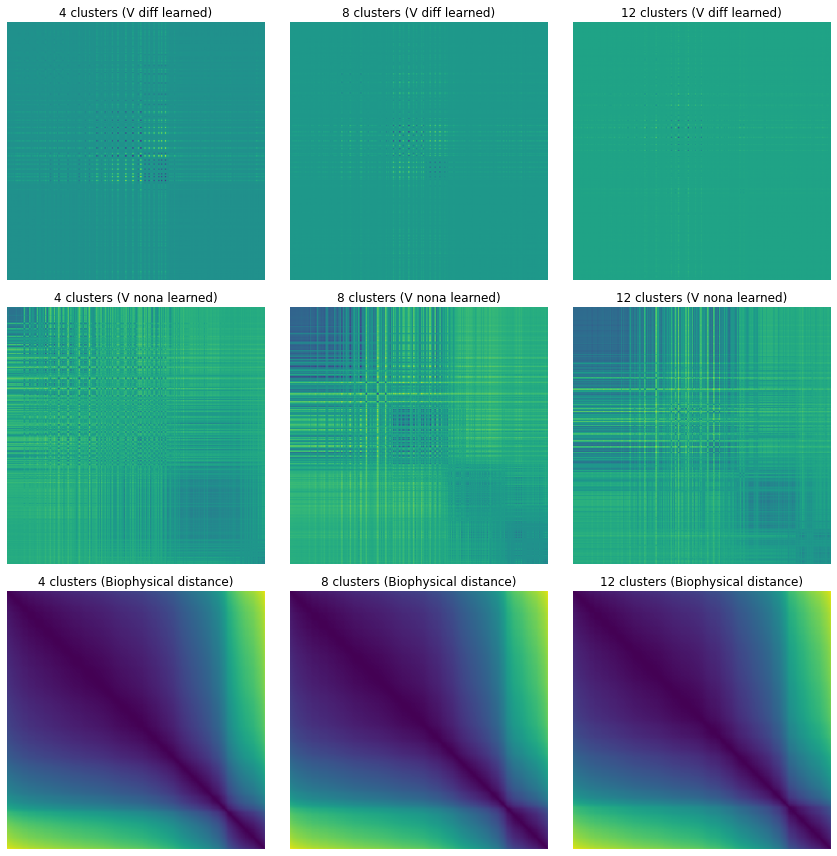

In [11]:
fig, axs = plt.subplots(nrows=3, ncols=3, figsize = (12,12))

C4_dist_ord = np.argsort(C4_dist_raw[:2000])
C8_dist_ord = np.argsort(C8_dist_raw[:2000])
C12_dist_ord = np.argsort(C12_dist_raw[:2000])

axs[0,0].imshow(C4_diff[:,C4_dist_ord][C4_dist_ord,:])
axs[0,1].imshow(C8_diff[:,C8_dist_ord][C8_dist_ord,:])
axs[0,2].imshow(C12_diff[:,C12_dist_ord][C12_dist_ord,:])
axs[1,0].imshow(C4_nona[:,C4_dist_ord][C4_dist_ord,:])
axs[1,1].imshow(C8_nona[:,C8_dist_ord][C8_dist_ord,:])
axs[1,2].imshow(C12_nona[:,C12_dist_ord][C12_dist_ord,:])

axs[2,0].imshow(C4_dist[:,C4_dist_ord][C4_dist_ord,:])
axs[2,1].imshow(C8_dist[:,C8_dist_ord][C8_dist_ord,:])
axs[2,2].imshow(C12_dist[:,C12_dist_ord][C12_dist_ord,:])

for i in range(3):
    for j in range(3):
        axs[i,j].axis("off")
        
axs[0,0].set_title("4 clusters (V diff learned)")
axs[0,1].set_title("8 clusters (V diff learned)")
axs[0,2].set_title("12 clusters (V diff learned)")
axs[1,0].set_title("4 clusters (V nona learned)")
axs[1,1].set_title("8 clusters (V nona learned)")
axs[1,2].set_title("12 clusters (V nona learned)")
axs[2,0].set_title("4 clusters (Biophysical distance)")
axs[2,1].set_title("8 clusters (Biophysical distance)")
axs[2,2].set_title("12 clusters (Biophysical distance)")

fig.tight_layout()
plt.show()

In [12]:
x, y = np.triu_indices(2000, k=0)

C4_diff_tri = C4_diff[x,y]
C4_nona_tri = C4_nona[x,y]
C8_diff_tri = C8_diff[x,y]
C8_nona_tri = C8_nona[x,y]
C12_diff_tri = C12_diff[x,y]
C12_nona_tri = C12_nona[x,y]

C4_dist_tri = C4_dist[x,y]
C8_dist_tri = C8_dist[x,y]
C12_dist_tri = C12_dist[x,y]

C4_diff_nona_corr, C4_diff_nona_p = scipy.stats.spearmanr(C4_diff_tri, C4_nona_tri)
C8_diff_nona_corr, C8_diff_nona_p = scipy.stats.spearmanr(C8_diff_tri, C8_nona_tri)
C12_diff_nona_corr, C12_diff_nona_p = scipy.stats.spearmanr(C12_diff_tri, C12_nona_tri)

C4_dist_diff_corr, C4_dist_diff_p = scipy.stats.spearmanr(C4_diff_tri, C4_dist_tri)
C8_dist_diff_corr, C8_dist_diff_p = scipy.stats.spearmanr(C8_diff_tri, C8_dist_tri)
C12_dist_diff_corr, C12_dist_diff_p = scipy.stats.spearmanr(C12_diff_tri, C12_dist_tri)

C4_dist_nona_corr, C4_dist_nona_p = scipy.stats.spearmanr(C4_nona_tri, C4_dist_tri)
C8_dist_nona_corr, C8_dist_nona_p = scipy.stats.spearmanr(C8_nona_tri, C8_dist_tri)
C12_dist_nona_corr, C12_dist_nona_p = scipy.stats.spearmanr(C12_nona_tri, C12_dist_tri)

print("V_diff learned vs. V_nona learned (4 clusters):", C4_diff_nona_corr)
print("V_diff learned vs. V_nona learned (8 clusters):", C8_diff_nona_corr)
print("V_diff learned vs. V_nona learned (12 clusters):", C12_diff_nona_corr)
print("----------")

print("Biophysical dist. vs. V_diff learned (4 clusters):", C4_dist_diff_corr)
print("Biophysical dist. vs. V_diff learned (8 clusters):", C8_dist_diff_corr)
print("Biophysical dist. vs. V_diff learned (12 clusters):", C12_dist_diff_corr)
print("----------")

print("Biophysical dist. vs. V_nona learned (4 clusters):", C4_dist_nona_corr)
print("Biophysical dist. vs. V_nona learned (8 clusters):", C8_dist_nona_corr)
print("Biophysical dist. vs. V_nona learned (12 clusters):", C12_dist_nona_corr)

V_diff learned vs. V_nona learned (4 clusters): 0.21499203170953318
V_diff learned vs. V_nona learned (8 clusters): 0.13643238758194487
V_diff learned vs. V_nona learned (12 clusters): 0.12034479089758807
----------
Biophysical dist. vs. V_diff learned (4 clusters): -0.07692318080019986
Biophysical dist. vs. V_diff learned (8 clusters): -0.053294544263399066
Biophysical dist. vs. V_diff learned (12 clusters): -0.00933778874205918
----------
Biophysical dist. vs. V_nona learned (4 clusters): -0.14716513742131854
Biophysical dist. vs. V_nona learned (8 clusters): 0.08959269108247472
Biophysical dist. vs. V_nona learned (12 clusters): 0.17077299068431842


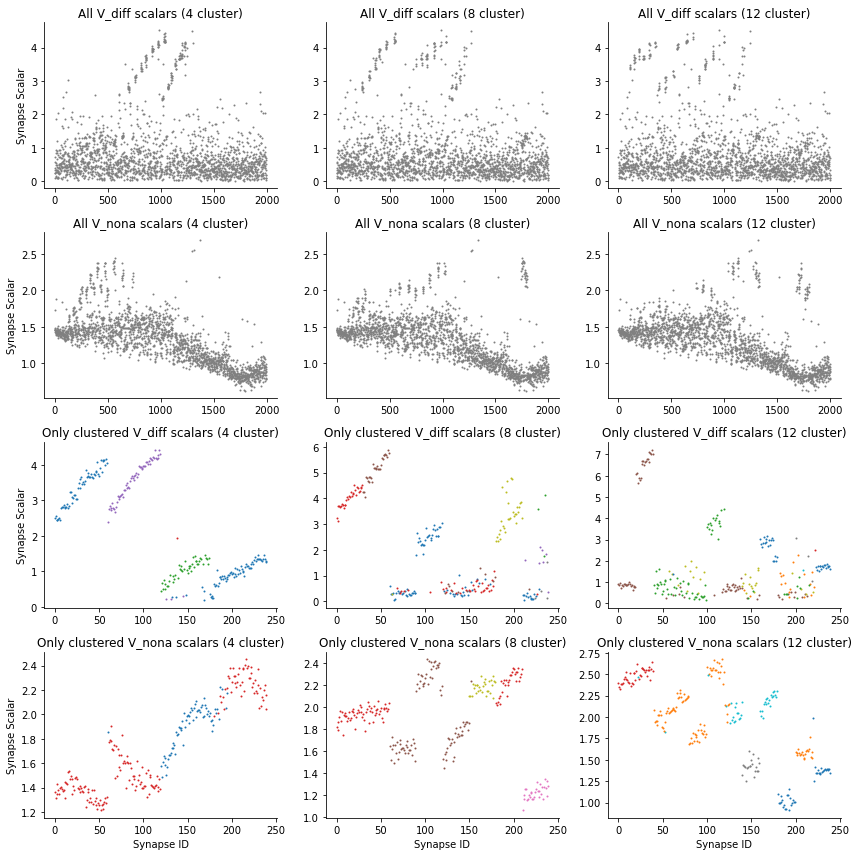

In [5]:
C4_dist_ord = np.argsort(C4_dist_raw[:2000])
C8_dist_ord = np.argsort(C8_dist_raw[:2000])
C12_dist_ord = np.argsort(C12_dist_raw[:2000])
C4_dist_ord_part = np.argsort(C4_dist_raw[880:1120])
C8_dist_ord_part = np.argsort(C8_dist_raw[880:1120])
C12_dist_ord_part = np.argsort(C12_dist_raw[880:1120])

fig, axs = plt.subplots(nrows=4, ncols=3, figsize=(12,12))

bg_idx = np.delete(np.arange(2000), np.arange(880,1120))
axs[0,0].scatter(np.arange(2000), C4_diff_scale[C4_dist_ord], s=1, color='gray')
axs[0,1].scatter(np.arange(2000), C4_diff_scale[C8_dist_ord], s=1, color='gray')
axs[0,2].scatter(np.arange(2000), C4_diff_scale[C12_dist_ord], s=1, color='gray')
axs[1,0].scatter(np.arange(2000), C4_nona_scale[C4_dist_ord], s=1, color='gray')
axs[1,1].scatter(np.arange(2000), C4_nona_scale[C8_dist_ord], s=1, color='gray')
axs[1,2].scatter(np.arange(2000), C4_nona_scale[C12_dist_ord], s=1, color='gray')

for i in range(5):
    C4_diff_part_idx = np.where(C4_diff_idx[880:1120] == i)[0]
    C4_nona_part_idx = np.where(C4_nona_idx[880:1120] == i)[0]
    axs[2,0].scatter(C4_diff_part_idx, C4_diff_scale[C4_diff_part_idx + 880], s=1)
    axs[3,0].scatter(C4_nona_part_idx, C4_nona_scale[C4_nona_part_idx + 880], s=1)
for i in range(9):
    C8_diff_part_idx = np.where(C8_diff_idx[880:1120] == i)[0]
    C8_nona_part_idx = np.where(C8_nona_idx[880:1120] == i)[0]
    axs[2,1].scatter(C8_diff_part_idx, C8_diff_scale[C8_diff_part_idx + 880], s=1)
    axs[3,1].scatter(C8_nona_part_idx, C8_nona_scale[C8_nona_part_idx + 880], s=1)
for i in range(13):
    C12_diff_part_idx = np.where(C12_diff_idx[880:1120] == i)[0]
    C12_nona_part_idx = np.where(C12_nona_idx[880:1120] == i)[0]
    axs[2,2].scatter(C12_diff_part_idx, C12_diff_scale[C12_diff_part_idx + 880], s=1)
    axs[3,2].scatter(C12_nona_part_idx, C12_nona_scale[C12_nona_part_idx + 880], s=1)

axs[0,0].set_title("All V_diff scalars (4 cluster)")
axs[0,1].set_title("All V_diff scalars (8 cluster)")
axs[0,2].set_title("All V_diff scalars (12 cluster)")
axs[1,0].set_title("All V_nona scalars (4 cluster)")
axs[1,1].set_title("All V_nona scalars (8 cluster)")
axs[1,2].set_title("All V_nona scalars (12 cluster)")
axs[2,0].set_title("Only clustered V_diff scalars (4 cluster)")
axs[2,1].set_title("Only clustered V_diff scalars (8 cluster)")
axs[2,2].set_title("Only clustered V_diff scalars (12 cluster)")
axs[3,0].set_title("Only clustered V_nona scalars (4 cluster)")
axs[3,1].set_title("Only clustered V_nona scalars (8 cluster)")
axs[3,2].set_title("Only clustered V_nona scalars (12 cluster)")

for row in range(4):
    for col in range(3):
        axs[row,col].spines['right'].set_visible(False)
        axs[row,col].spines['top'].set_visible(False)
        
for i in range(3):
    axs[-1,i].set_xlabel("Synapse ID")
for i in range(4):
    axs[i,0].set_ylabel("Synapse Scalar")

fig.tight_layout()

In [6]:
true4_diff = np.load("/media/hdd01/sklee/CA1_clust4-60/data/V_diff_stimseed1.npy")[-20*50000:].reshape(-1,50000)
hand4_diff = np.load("/media/hdd01/sklee/CA1_clust4-60/hand/gru_s10_h20_output.npz")["test"]
clust4_diff = np.load("/media/hdd01/sklee/CA1_clust4-60/clust/gru_s5_h20_pretrain_output_rep1.npz")["test"]
true4_nona = np.load("/media/hdd01/sklee/CA1_clust4-60_noNA/data/vdata_T10_Ne2000_gA0.6_tauA1_gN0.8_Ni200_gG0.1_gB0.1_noDendNa_Er0.5_Ir7.4_random_NR_rep1000_stimseed1.npy")[-20:,:50000]
hand4_nona = np.load("/media/hdd01/sklee/CA1_clust4-60_noNA/hand/gru_s10_h20_output.npz")["test"]
clust4_nona = np.load("/media/hdd01/sklee/CA1_clust4-60_noNA/clust/gru_s5_h20_pretrain_output_rep1.npz")["test"]

true8_diff = np.load("/media/hdd01/sklee/CA1_clust8-30/data/V_diff_stimseed1.npy")[-20*50000:].reshape(-1,50000)
hand8_diff = np.load("/media/hdd01/sklee/CA1_clust8-30/hand/gru_s14_h20_output.npz")["test"]
clust8_diff = np.load("/media/hdd01/sklee/CA1_clust8-30/clust/gru_s9_h20_pretrain_output_rep1.npz")["test"]
true8_nona = np.load("/media/hdd01/sklee/CA1_clust8-30_noNA/data/vdata_T10_Ne2000_gA0.6_tauA1_gN0.8_Ni200_gG0.1_gB0.1_noDendNa_Er0.5_Ir7.4_random_NR_rep1000_stimseed1.npy")[-20:,:50000]
hand8_nona = np.load("/media/hdd01/sklee/CA1_clust8-30_noNA/hand/gru_s14_h20_output.npz")["test"]
clust8_nona = np.load("/media/hdd01/sklee/CA1_clust8-30_noNA/clust/gru_s9_h20_pretrain_output_rep1.npz")["test"]

true12_diff = np.load("/media/hdd01/sklee/CA1_clust12-20/data/V_diff_stimseed1.npy")[-20*50000:].reshape(-1,50000)
hand12_diff = np.load("/media/hdd01/sklee/CA1_clust12-20/hand/gru_s18_h20_output.npz")["test"]
clust12_diff = np.load("/media/hdd01/sklee/CA1_clust12-20/clust/gru_s13_h20_pretrain_output_rep1.npz")["test"]
true12_nona = np.load("/media/hdd01/sklee/CA1_clust12-20_noNA/data/vdata_T10_Ne2000_gA0.6_tauA1_gN0.8_Ni200_gG0.1_gB0.1_noDendNa_Er0.5_Ir7.4_random_NR_rep1000_stimseed1.npy")[-20:,:50000]
hand12_nona = np.load("/media/hdd01/sklee/CA1_clust12-20_noNA/hand/gru_s18_h20_output.npz")["test"]
clust12_nona = np.load("/media/hdd01/sklee/CA1_clust12-20_noNA/clust/gru_s13_h20_pretrain_output_rep1.npz")["test"]

In [ ]:
var_exp = np.zeros((20, 6))

for i in tnrange(20):
    var_exp[i,0] = 